<a href="https://colab.research.google.com/github/xanasa14/Finances/blob/main/DownloadingDataYahooFinance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install yfinance
!pip install yahoofinancials

  Created wheel for yahoofinancials: filename=yahoofinancials-1.6-cp36-none-any.whl size=15192 sha256=6dfe65c057bb09e9b4186f131735dc6e74ca07380b78d5b389fcd0fc8ba3696f
  Stored in directory: /root/.cache/pip/wheels/d9/7e/cf/4977a8572d5247242a4b13018d1d36923024ba84236e0d28bc
Successfully built yahoofinancials


In [3]:
import pandas as pd
import yfinance as yf
from yahoofinancials import YahooFinancials

In [15]:
companies = ['TSLA',"AMZN",'WMT','']
tsla_df = yf.download('TSLA', 
                      start='2019-01-01', 
                      end='2021-02-22', 
                      progress=False)
print(tsla_df.head())
print(len(tsla_df))

                   Open         High  ...    Adj Close   Volume
Date                                  ...                      
2019-01-02  1465.199951  1553.359985  ...  1539.130005  7983100
2019-01-03  1520.010010  1538.000000  ...  1500.280029  6975600
2019-01-04  1530.000000  1594.000000  ...  1575.390015  9182600
2019-01-07  1602.310059  1634.560059  ...  1629.510010  7993200
2019-01-08  1664.689941  1676.609985  ...  1656.579956  8881400

[5 rows x 6 columns]
538


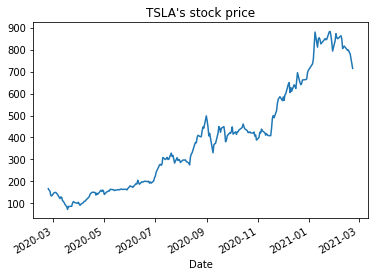

In [12]:

ticker = yf.Ticker('TSLA')

tsla_df = ticker.history(period="1Y")

tsla_df['Close'].plot(title="TSLA's stock price")